In [4]:
import sys
from configparser import ConfigParser
from utility.config_interpreter import ConfigInterpreter

from fitter.targeting_efficiency_estimator import setup_workflow
from flow_ctyometry.fcs_display import *
from utility.flow_utility import *

In [5]:
def get_mfis(config_files):
    return [ConfigInterpreter(config_file, 
                              get_mean_signal_per_cell, 
                              get_standard_error_of_mean_all_samples,
                              remove_outliers_and_control_median_workflow) for config_file in config_files]
def get_pcas(config_files):
    return [ConfigInterpreter(config_file,
                              get_percent_association, 
                              get_standard_error_of_mean_all_samples,
                              remove_outliers_and_control_median_workflow) for config_file in config_files]

In [6]:
raw_capsule_configs = ["/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_1032nm_capsule_raw.ini",
                       "/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_480nm_capsule_raw.ini",
                       "/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_214nm_capsule_raw.ini"]

raw_coreshell_configs = ["/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_633nm_coreshell_raw.ini",
                         "/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_282nm_coreshell_raw.ini",
                         "/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_150nm_coreshell_raw.ini",
                         "/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_95nm_coreshell_raw.ini"]

thp1_capsule_configs = ["/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_1032nm_capsule_thp1.ini",
                        "/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_480nm_capsule_thp1.ini",
                        "/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_214nm_capsule_thp1.ini"]
thp1_coreshell_configs = ["/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_633nm_coreshell_thp1.ini",
                          "/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_282nm_coreshell_thp1.ini",
                          "/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_150nm_coreshell_thp1.ini"]

hela_capsule_configs = ["/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_1032nm_capsule_hela.ini",
                        "/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_480nm_capsule_hela.ini",
                        "/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_214nm_capsule_hela.ini"]
hela_coreshell_configs = ["/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_633nm_coreshell_hela.ini",
                          "/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_282nm_coreshell_hela.ini",
                          "/media/sf_Dropbox/scienceData/fcs data/incubation_ini_files_for_paper/leo_150nm_coreshell_hela.ini"]

In [7]:
raw_capsule_mfis, thp1_capsule_mfis, hela_capsule_mfis = get_mfis(raw_capsule_configs), get_mfis(thp1_capsule_configs), get_mfis(hela_capsule_configs)
raw_coreshell_mfis, thp1_coreshell_mfis, hela_coreshell_mfis = get_mfis(raw_coreshell_configs), get_mfis(thp1_coreshell_configs), get_mfis(hela_coreshell_configs)

raw_capsule_pcas, thp1_capsule_pcas, hela_capsule_pcas = get_pcas(raw_capsule_configs), get_pcas(thp1_capsule_configs), get_pcas(hela_capsule_configs)
raw_coreshell_pcas, thp1_coreshell_pcas, hela_coreshell_pcas = get_pcas(raw_coreshell_configs), get_pcas(thp1_coreshell_configs), get_pcas(hela_coreshell_configs)

In [94]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.linewidth'] = 2.0
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

mpl.rc('font', **font)

def label_and_spines(ax, top_left_label):
    plt.text(-0.2, 1.1, top_left_label, horizontalalignment='center', verticalalignment='center', 
             transform=ax.transAxes, fontsize=14, fontweight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

def plot_configs(cfgs: [ConfigInterpreter], top_left_label, **kwargs):
    lines = []
    for cfg in cfgs:
        hour_times = [t/60 for t in cfg.times]
        lines.append(plt.errorbar(hour_times, cfg.val_means, **kwargs,
                                  yerr=cfg.val_means_std_dev,
                                  label=cfg.config['particle']['particle_name'],
                                  marker='o'))
    label_and_spines(plt.gca(), top_left_label)
    plt.xlabel('Time (h)')
    plt.xlim(0,25)
    return lines

def get_ax_loc_in_fig_coordinates(fig, ax):
    trans = fig.transFigure.inverted()
    ax_loc = ax.get_tightbbox(fig.canvas.get_renderer())
    af_loc = trans.transform(ax_loc)
    bbox = mpl.transforms.Bbox(af_loc)
    return bbox
    #     trans = fig.transFigure.inverted
#     axs = fig.transFigure.inverted().transform(axs[0].get_tightbbox(fig.canvas.get_renderer()))
    
    

def box_up_subplots(fig, axs, label, wspacing=0.01,hspacing=.08):
    bbs = [get_ax_loc_in_fig_coordinates(fig, ax) for ax in axs]

    x0s = [bb.x0 for bb in bbs]
    x1s = [bb.x1 for bb in bbs]
    y0s = [bb.y0 for bb in bbs]
    y1s = [bb.y1 for bb in bbs]
    mx, my = min(x0s), min(y0s)
    
    w, h = max(x1s)-mx, max(y1s)-my
 
    #"space out" so we're not exactly flush with the sides
    rx = max(mx-wspacing*w, 0)
    ry = max(my-hspacing*h, 0)
    rw = min(w*(1+wspacing*2), 1)
    rh = min(h*(1+hspacing*2), 1)

    rect = plt.Rectangle((rx,ry),rw,rh,
                         fill=False, zorder=-4,
                         edgecolor='black', lw=2.0,
                         transform=fig.transFigure, figure=fig)
    fig.patches.extend([rect])
    plt.figtext(rx+rw/2, ry+rh, label, horizontalalignment='center', verticalalignment='center',
               fontsize=16, backgroundcolor='white', zorder=-3)
    




Text(0.5, 1.4, 'RAW')

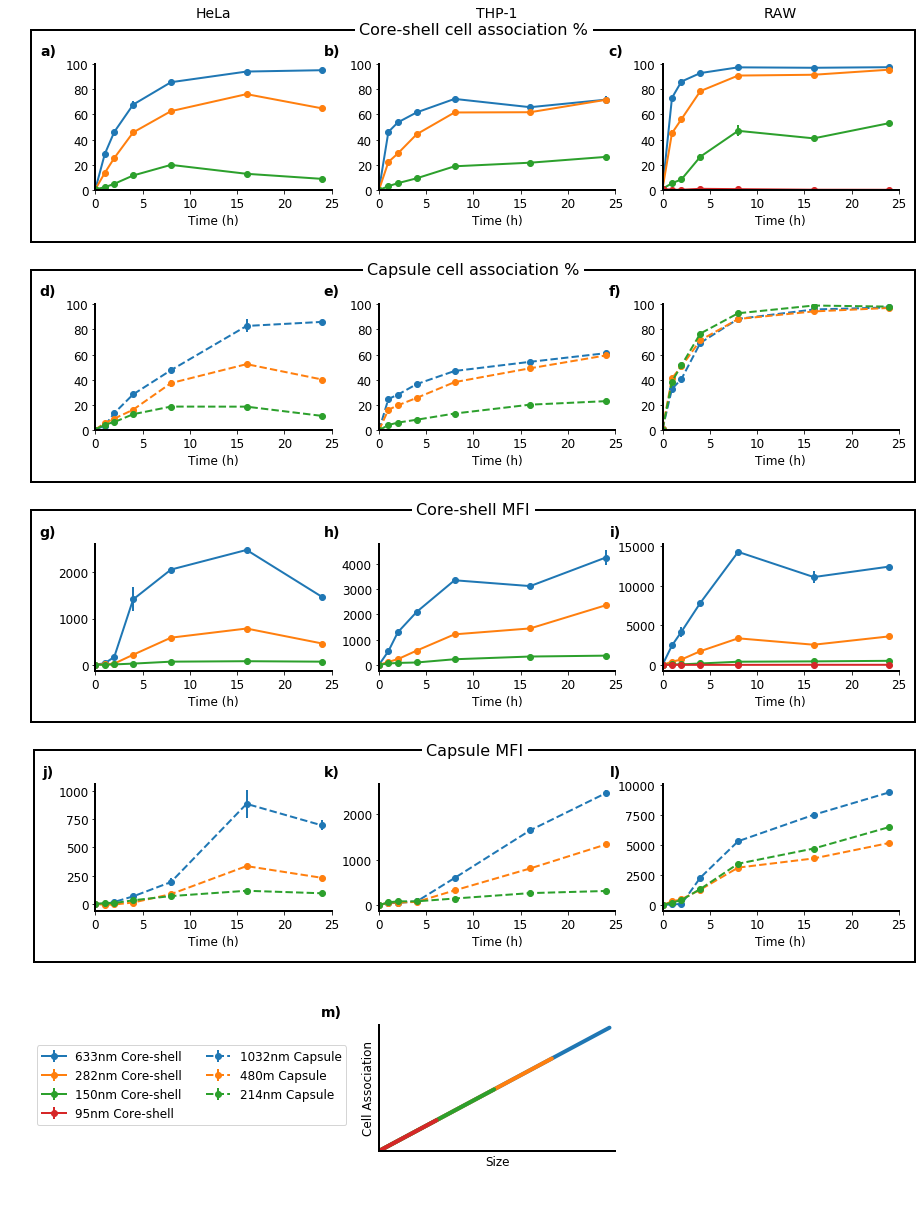

In [110]:
fig = plt.figure(figsize=(14.4, 20))
r = 5
c = 3

lines = []
plt.subplot(r,c,1)
plot_configs(hela_coreshell_pcas, 'a)')
plt.ylim((0, 100))
# plt.ylabel('Cell Association (%)')
#plt.text(0.5, 1.2, 'HeLa', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=plt.gca().transAxes)
plt.subplot(r,c,2)
plot_configs(thp1_coreshell_pcas, 'b)')
#plt.text(0.5, 1.2, 'THP-1', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=plt.gca().transAxes)
plt.ylim((0, 100))
plt.subplot(r,c,3)
lines += plot_configs(raw_coreshell_pcas, 'c)')
#plt.text(0.5, 1.2, 'RAW', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=plt.gca().transAxes)
plt.ylim((0, 100))

plt.subplot(r,c,4)
plot_configs(hela_capsule_pcas, 'd)', linestyle='dashed')
plt.ylim((0, 100))
# plt.ylabel('Cell Association (%)')
plt.subplot(r,c,5)
plot_configs(thp1_capsule_pcas, 'e)', linestyle='dashed')
plt.ylim((0, 100))
plt.subplot(r,c,6)
lines += plot_configs(raw_capsule_pcas, 'f)', linestyle='dashed')
plt.ylim((0, 100))

midright_ax = plt.gca()

plt.subplot(r,c,7)
plot_configs(hela_coreshell_mfis, 'g)')
# plt.ylabel('MFI')
#plt.text(0.5, 1.2, 'HeLa', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=plt.gca().transAxes)
plt.subplot(r,c,8)
plot_configs(thp1_coreshell_mfis, 'h)')
#plt.text(0.5, 1.2, 'THP-1', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=plt.gca().transAxes)
plt.subplot(r,c,9)
#plt.text(0.5, 1.2, 'RAW', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=plt.gca().transAxes)
plot_configs(raw_coreshell_mfis, 'i)')

plt.subplot(r,c,10)
plot_configs(hela_capsule_mfis, 'j)', linestyle='dashed')
# plt.ylabel('MFI')
plt.subplot(r,c,11)
plot_configs(thp1_capsule_mfis, 'k)', linestyle='dashed')
plt.subplot(r,c,12)
plot_configs(raw_capsule_mfis, 'l)', linestyle='dashed')


#plt.subplot(r+1,1,1)
axs = plt.subplot(r,c,14)

plt.plot([0,4], [0,4], color='#1f77b4', linewidth=4.0, solid_capstyle='round')
plt.plot([0,3], [0,3], color='#ff7f0e', linewidth=4.0, solid_capstyle='round')
plt.plot([0,2], [0,2], color='#2ca02c', linewidth=4.0, solid_capstyle='round')
plt.plot([0,1], [0,1], color='#d62728', linewidth=4.0, solid_capstyle='round')

plt.xlim([0,4.1])
plt.ylim([0,4.1])
plt.xticks([])
plt.yticks([])
plt.xlabel('Size')
plt.ylabel('Cell Association')
label_and_spines(plt.gca(), 'm)')

           

# plt.tight_layout(rect=[0.1,0.1,0.9,0.9])
plt.subplots_adjust(hspace=0.9)
fig.legend(lines, ["633nm Core-shell", '282nm Core-shell', '150nm Core-shell', '95nm Core-shell', 
                   '1032nm Capsule', '480m Capsule', '214nm Capsule'], ncol=2, loc=(0.04,0.08) )
# plt.tight_layout()
# midright_ax.plot([-2.7, 1], [-0.45, -0.45], transform=midright_ax.transAxes, linewidth=6.0, 
#                  color='grey', solid_capstyle='round', clip_on=False)
axs = fig.axes
box_up_subplots(fig, axs[0:3], 'Core-shell cell association %')
box_up_subplots(fig, axs[3:6], 'Capsule cell association %')
box_up_subplots(fig, axs[6:9], 'Core-shell MFI')
box_up_subplots(fig, axs[9:12], 'Capsule MFI')

plt.figtext(0.5, 1.4, 'HeLa', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=axs[0].transAxes)
plt.figtext(0.5, 1.4, 'THP-1', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=axs[1].transAxes)
plt.figtext(0.5, 1.4, 'RAW', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=axs[2].transAxes)

#     print(fig.transFigure.transform((mx,my)))

#plt.savefig('test.png')                      

